In [41]:
#pca & metrics 14 02 2022

In [42]:
from sklearn.datasets import load_diabetes
X,y=load_diabetes(return_X_y=True)

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca1=pca.fit_transform(X)
pca1

array([[ 2.79306207e-02, -9.26011612e-02],
       [-1.34686052e-01,  6.52634060e-02],
       [ 1.29447396e-02, -7.77641691e-02],
       [ 2.34543980e-03,  1.81819367e-02],
       [-3.59806910e-02,  3.86213572e-02],
       [-1.88660280e-01, -1.81251413e-02],
       [-9.48347610e-02, -3.83155499e-02],
       [ 9.87389258e-02,  8.69453424e-02],
       [ 2.86833351e-02, -4.19169143e-02],
       [-1.00910711e-02, -2.34450670e-02],
       [-1.83419418e-01, -7.28738089e-02],
       [ 1.88796730e-02, -3.00873701e-02],
       [-7.59323171e-02,  4.66838722e-02],
       [ 1.51473512e-02, -3.09692487e-02],
       [-8.01694940e-02,  8.64707740e-02],
       [ 1.40488092e-01,  4.51897240e-02],
       [ 7.58600302e-03,  4.33946961e-02],
       [ 1.08839198e-01, -7.06819254e-03],
       [-5.49947993e-02, -2.03725705e-02],
       [-8.42651351e-02,  4.41806793e-02],
       [-9.55955468e-02, -1.37941404e-02],
       [-9.18719735e-02, -3.95423697e-02],
       [-7.97268029e-02,  3.42316116e-02],
       [ 1.

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pcai = pca.fit_transform(x)
#Convert array to dataframe
principalDf = pd.DataFrame(data = pcai
             , columns = ['principal component 1', 'principal component 2'])

In [5]:
#Concatenate target in dataFrame
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

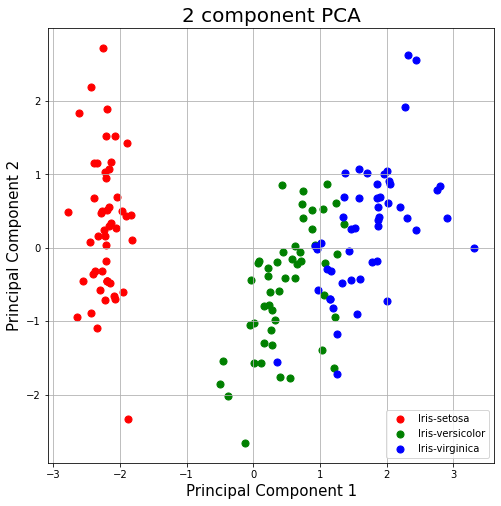

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [45]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
for train, test in kf.split(X, y):
  Xtrain, Xtest = X[train], X[test] 
  ytrain, ytest = y[train], y[test]

In [46]:
print(Xtrain.shape , ytrain.shape)
print(Xtest.shape , ytest.shape)

(354, 10) (354,)
(88, 10) (88,)


In [47]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(Xtrain,ytrain)

LinearRegression()

In [48]:
model_lr.score(Xtest, ytest)

0.5502492259658611

In [49]:
model_lr.score(Xtrain, ytrain)

0.5077517592258138

In [50]:
y_pred_lr=model_lr.predict(Xtest)

In [51]:
from sklearn import metrics
import numpy as np
print("Mean Absolute Error is = ", metrics.mean_absolute_error(ytest,y_pred_lr))
print("Mean Squared Error is = ", metrics.mean_squared_error(ytest,y_pred_lr))
print("Root Mean Square Error is = ", np.sqrt(metrics.mean_squared_error(ytest,y_pred_lr)))

Mean Absolute Error is =  42.38729269073616
Mean Squared Error is =  2910.2069332665283
Root Mean Square Error is =  53.94633382600275


In [52]:
from sklearn.tree import DecisionTreeRegressor 
model_dt=DecisionTreeRegressor()
model_dt.fit(Xtrain,ytrain)

DecisionTreeRegressor()

In [53]:
y_pred_dt=model_dt.predict(Xtest)

In [54]:
print("Mean Absolute Error is = ", metrics.mean_absolute_error(ytest,y_pred_dt))
print("Mean Squared Error is = ", metrics.mean_squared_error(ytest,y_pred_dt))
print("Root Mean Square Error is = ", np.sqrt(metrics.mean_squared_error(ytest,y_pred_dt)))

Mean Absolute Error is =  72.56818181818181
Mean Squared Error is =  8344.068181818182
Root Mean Square Error is =  91.34587118101278


In [62]:
model_dt.score(Xtest, ytest)

-0.28951349832505735

In [63]:
model_dt.score(Xtrain, ytrain)

1.0

In [56]:
# ensemble method

In [57]:
from sklearn.ensemble import StackingRegressor
level0=list()
level0.append(('lr',LinearRegression()))
level0.append(('dt',DecisionTreeRegressor()))
level1=LinearRegression()
model_en=StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

In [58]:
model_en.fit(Xtrain, ytrain)

StackingRegressor(cv=5,
                  estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor())],
                  final_estimator=LinearRegression())

In [59]:
y_pred_en=model_en.predict(Xtest)

In [60]:
print("Mean Absolute Error is = ", metrics.mean_absolute_error(ytest,y_pred_en))
print("Mean Squared Error is = ", metrics.mean_squared_error(ytest,y_pred_en))
print("Root Mean Square Error is = ", np.sqrt(metrics.mean_squared_error(ytest,y_pred_en)))

Mean Absolute Error is =  43.037968675943894
Mean Squared Error is =  2952.862933915582
Root Mean Square Error is =  54.3402515076585


In [1]:
model_en.score(Xtest, ytest)

NameError: name 'model_en' is not defined

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax=fig.add(subplot(1,1,1))
targets=['Iris-setosa','Iris-Versicolor','Iris-Verginica']
colors=['r','g','b']
for target,colors in zip(target)